In [1]:
import math,csv, random, collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import scipy.sparse as sparse
import h5py
import utils
from collections import Counter
import imp, time
from numpy import linalg as LA
imp.reload(utils)
pd.set_option('display.max_rows', 6)
from sklearn.metrics.pairwise import pairwise_distances
import pickle
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'



In [2]:
# Loading data
class_names, _, _, X_val, y_val, _, _ = utils.load_tiny_imagenet(\
                        path='../../dataset/test_dataset/tiny-imagenet-200/', val_only=True)
X = X_val.reshape( X_val.shape[0], np.prod(X_val.shape[1:]) )

In [3]:
n       = 100
order   = np.argsort(y_val)
X_small = X[order][:n]
Y_small = y_val[order][:n]
dist_M  = pairwise_distances(X_small, X_small, metric='l2', n_jobs=1)

ValueError: a must be non-empty

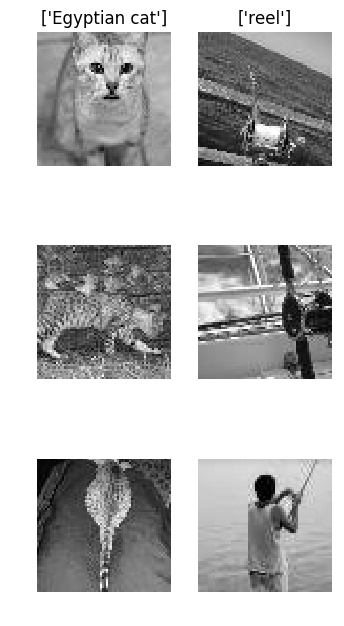

In [4]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = class_names[:5]
num_classes = len(classes)
samples_per_class = 3
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(Y_small == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        image = X_small[idx].astype('uint8').reshape(X_val.shape[1:])
        plt.imshow(image[1])
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [ ]:
no_images = 10
image_id = np.random.choice(np.arange(n), replace=False, size=no_images)
neighbhours_per_image = 15
for index, j in enumerate(image_id):
    idxs = dist_M[j].argsort()[:neighbhours_per_image]
    for i, idx in enumerate(idxs):
        plt_idx = i * no_images + index + 1
        plt.subplot(no_images, neighbhours_per_image, plt_idx)
        image = X_small[idx].astype('uint8').reshape(X_val.shape[1:])
        plt.imshow(image[1])
        plt.axis('off')
plt.show()

In [ ]:
neighbhours_per_image = 10
answer = np.zeros((n,neighbhours_per_image+1))
s = 0
for j in np.arange(n):
    idxs = dist_M[j].argsort()[:neighbhours_per_image]
    answer[j][0] = j
    answer[j][1:] = idxs

In [ ]:
pickle.dump( answer, open( "../../results/knn_tiny_imagenet_k=10.pkl", "wb" ) )

In [7]:
np.savetxt('../../dataset/test_dataset/basic_io_dataset/1000_images.txt',
           np.array(X_small, dtype='int'))